# Degree Distribution


In [5]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from HONG import *
import HONG
import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import seaborn as sb
import pandas as pd

mpl.style.use('report_style.mplstyle')

In [6]:
prop_committed = 0.03
beta_non_committed = 0.56
beta_committed = 0.56
ensemble_size = 10
run_length = 10**6
q = 1
social_structures = ['InVS15', 'LyonSchool', 'SFHH', 'Thiers13']

In [24]:
for i in social_structures[1:2]:
    run_ensemble_experiment(prop_committed, beta_non_committed, beta_committed, ensemble_size, run_length, i, q)

100%|██████████| 5/5 [14:52<00:00, 178.51s/it]


[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5
 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5]
[0.000e+00 0.000e+00 1.133e+03 1.660e+02 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.00

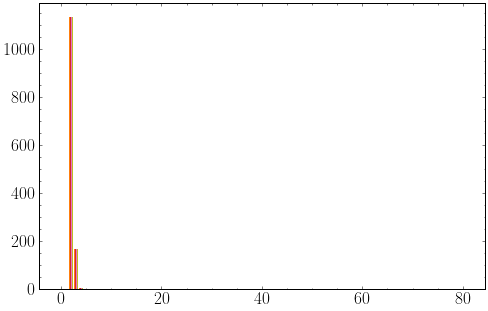

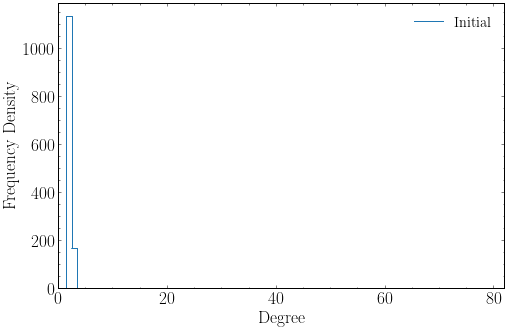

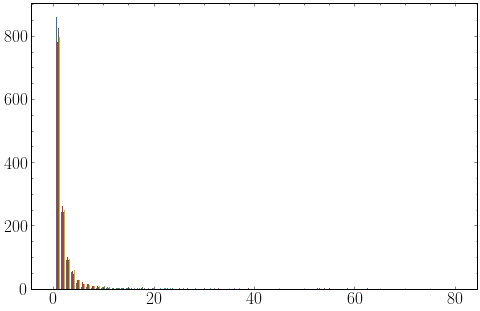

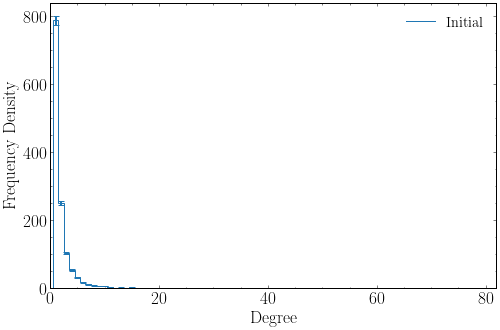

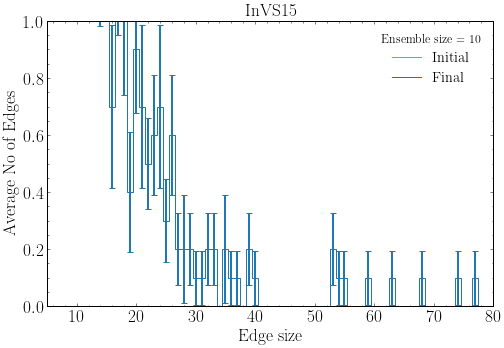

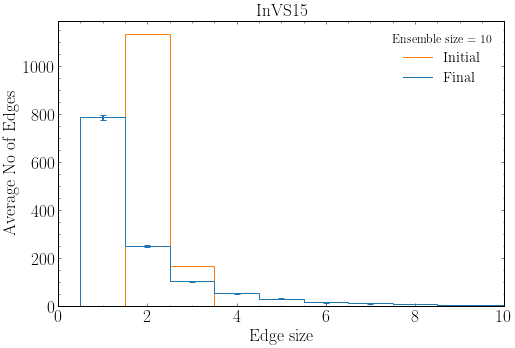

In [7]:
### set params and load data
social_structure = 'InVS15'
output_fname = f'{social_structure}_{prop_committed}_{beta_non_committed}_{beta_committed}_q={q}_{run_length}_{ensemble_size}'
data = pd.read_csv(f'aux_outputs/{output_fname}.csv', header=None)
###

### split data according to how it is written into the file
initial_size = data.iloc[0::2].to_numpy(dtype=int)
final_size = data.iloc[1::2].to_numpy(dtype=int)
###


### plot the initial and final degree distributions in the same bins
plt.figure(1)
same_bin_edges = np.linspace(-0.5, 80.5, num=82, endpoint = True)
same_bin_centres = [(same_bin_edges[i]+same_bin_edges[i+1])/2 for i in range(81)]
print(same_bin_edges)



initial_size_binned_freq = plt.hist(initial_size.T, bins=same_bin_edges, label='Initial', alpha=1)[0]
mean_initial_size_binned_freq = np.mean(initial_size_binned_freq, axis=0)
std_initial_size_binned_freq = np.std(initial_size_binned_freq, axis=0)#Here you shoud use np.std, not np.mean

print(mean_initial_size_binned_freq)

plt.figure(2)
plt.stairs(mean_initial_size_binned_freq, edges=same_bin_edges, label='Initial')
plt.errorbar(same_bin_centres, mean_initial_size_binned_freq, yerr=std_initial_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
plt.legend()
plt.xlim((0, 82))
plt.xlabel('Degree')
plt.ylabel('Frequency Density')
plt.savefig(f'figures/initial_edge_size_{output_fname}.pdf')



plt.figure(3)




final_size_binned_freq = plt.hist(final_size.T, bins=same_bin_edges, label='Initial', alpha=1)[0]
mean_final_size_binned_freq = np.mean(final_size_binned_freq, axis=0)
std_final_size_binned_freq = np.std(final_size_binned_freq, axis=0)#Here you shoud use np.std, not np.mean

print(mean_final_size_binned_freq)

plt.figure(4)
plt.stairs(mean_final_size_binned_freq, edges=same_bin_edges, label='Initial')
plt.errorbar(same_bin_centres, mean_final_size_binned_freq, yerr=std_final_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
plt.legend()
plt.xlim((0, 82))
plt.xlabel('Degree')
plt.ylabel('Frequency Density')
plt.savefig(f'figures/final_edge_size_{output_fname}.pdf')

plt.figure(5)
plt.stairs(mean_initial_size_binned_freq, edges=same_bin_edges, color='tab:orange', label='Initial')
plt.errorbar(same_bin_centres, mean_initial_size_binned_freq, yerr=std_initial_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:orange', capsize=3)
plt.stairs(mean_final_size_binned_freq, edges=same_bin_edges,color='tab:blue', label='Final')
plt.errorbar(same_bin_centres, mean_final_size_binned_freq, yerr=std_final_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
plt.legend(title = f'Ensemble size = {ensemble_size}')
plt.xlim((5, 80))
plt.ylim((0, 1))
plt.xlabel('Edge size')
plt.ylabel('Average No of Edges')
plt.title(social_structure)
plt.savefig(f'figures/combined_large_edge_size_{output_fname}.pdf')


plt.figure(6)
plt.stairs(mean_initial_size_binned_freq, edges=same_bin_edges, color='tab:orange', label='Initial')
plt.errorbar(same_bin_centres, mean_initial_size_binned_freq, yerr=std_initial_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:orange', capsize=3)
plt.stairs(mean_final_size_binned_freq, edges=same_bin_edges,color='tab:blue', label='Final')
plt.errorbar(same_bin_centres, mean_final_size_binned_freq, yerr=std_final_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:blue', capsize=3)
plt.legend(title = f'Ensemble size = {ensemble_size}')
plt.xlim((0, 10))
#plt.ylim((0, 1))
plt.xlabel('Edge size')
plt.ylabel('Average No of Edges')
plt.title(social_structure)
plt.savefig(f'figures/combined_edge_size_{output_fname}.pdf')



In [15]:
same_bin_edges = np.linspace(-0.5, 80.5, num=82, endpoint = True)

print(same_bin_edges)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5
 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5]
